In [72]:
import math
import numpy as np
import matplotlib.pyplot as plt

<br>

# Univariate Gaussian
---

The formula for a univariate Gaussian (or normal) distribution:

&emsp; $\boxed{\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\textstyle - \frac{1}{2 \sigma^2} (x-\mu)^2} = \frac{\vert \beta \vert}{\sqrt{2 \pi}} e^{\textstyle - \frac{\beta}{2}(x-\mu)^2}}$
&emsp; where
&emsp; $\mathbb{E}[x] = \mu$
&emsp; and
&emsp; $\mathbb{V}[x] = \sigma^2 = \beta^{-1}$

Knowing the mean $\mu$ and variance $\sigma^2$ (or alternatively the precisions $\beta$) of a gaussian distribution is enough to completely characterize the distribution. The mean is also the mode (the highest value of the distribution):

* The higher the variance $\sigma^2$, the smaller the precision $\beta$, the more spread the distribution is
* The higher the precision $\beta$, the smaller the variance $\sigma^2$, the more centralized the distribution is

<br>

### Product of gaussians

The product of gaussian appears quite often in Bayesian treatment of machine learning, in which we will often marginalize the probability of $x$ over the parameters $w$ of a model $p(x|w)$:

&emsp; $\displaystyle p(x) = \int_{\mathcal{W}} p(x|w) \, p(w) \, dw$

If $w$ follows a gaussian distribution, and if $x$ is gaussian, with a mean that is a linear function on $w$, then the resulting distribution is also gaussian:

&emsp; $p(w) = \mathcal{N}(\mu_{w}, \; \sigma_{w}^2)$
&emsp; and
&emsp; $p(x|w) = \mathcal{N}(a w + b, \; \alpha^2)$
&emsp; $\implies$
&emsp; $p(x) = \mathcal{N}(a \mu_w + b, \; a^2 \sigma_w^2 + \alpha^2)$

This has a link with correlation, which is the reduction of variance of $x$, knowing $w$.

&emsp; $\displaystyle r^2 = \frac{\sigma_x^2 - \alpha^2}{\sigma_x^2} = \frac{a^2 \sigma_w^2}{\sigma_x^2}$
&emsp; $\implies$
&emsp; $\displaystyle r = \frac{a \sigma_w}{\sigma_x} = \frac{a \sigma_w^2}{\sigma_x \sigma_w} = \frac{\mathbb{C}\text{ov}[x,w]}{\sqrt{\mathbb{V}[x] \mathbb{V}[w]}}$

<br>

### Convolutions of gaussians

This previous formula can be applied for the convolution of two gaussian. This occurs whenever we want to know the distribution of the **sum of two independent** variables $t = x + y$ that each follow a gaussian distribution:

&emsp; $\displaystyle p(t) = \int_{\mathcal{X}} p(t|x) \, p(x) \, dx$
&emsp; where
&emsp; $p(t|x) = \mathcal{N}(x + \mu_y, \, \sigma_y^2)$
&emsp; $\implies$
&emsp; $\displaystyle \boxed{p(x+y) = \mathcal{N}(\mu_x + \mu_y, \; \sigma_x^2 + \sigma_y^2)}$

Note that this formula is also true for any distribution, because of linearity of the expectation:

&emsp; $\mathbb{E}[x+y] = \mathbb{E}[x] + \mathbb{E}[y]$
&emsp; and
&emsp; $\mathbb{V}[x+y] = \mathbb{E}[(x+y)^2] = \mathbb{E}[x^2] + \mathbb{E}[y^2] + 2 \mathbb{E}[xy] = \mathbb{V}[x] + \mathbb{V}[y]$

<br>

### Moments

The p-moment of a distribution is defined as the expected value of functions $x \mapsto x^p$. The central p-moments of a distribution are defined as the expected value of functions $x \mapsto (x-\mu)^p$. Because the distribution is symmetric, the central moments are zero for even values of $p$.

&emsp; $\mathbb{E}[x] = \mu$ (first moment)

&emsp; $\mathbb{E}[x^2] = \mu^2 + \sigma^2$ (second moment)

&emsp; $\mathbb{E}[(x-\mu)^2] = \sigma^2 = \mathbb{V}[x]$ (central second moment, the variance)

The fact that the **central second moment is the variance** is used by PCA for multivariate gaussian. If we substract the variance, we have the co-variance, that is a linear transformation.

<br>

### Exponential distribution

The exponential distribution is part of the exponential distributions, of the form:

&emsp; $\displaystyle p(x|\theta) = h(x) \, g(\theta ) \, \exp \big( \eta (\theta )\cdot T(x) \big)$

Where the parameters $\theta = (\mu, \sigma^2)$ and we have the following (not unique) decomposition:

&emsp; $T(x) = \begin{pmatrix} 1 \\ x \\ x^2 \end{pmatrix}$
&emsp; $\eta(\theta) = \begin{pmatrix} -\mu^2 / (2 \sigma^2) \\ \mu / \sigma^2 \\ - 1 / (2 \sigma^2) \end{pmatrix}$
&emsp; $\displaystyle h(x) = \frac{1}{\sqrt{2 \pi}}$
&emsp; $\displaystyle g(\theta) = \frac{1}{\sqrt{\sigma^2}}$

So if we have an exponential, with inside it an **order 2 polynomial in x**, we get a Gaussian.

<br>

### Indefinite integral

The gaussian distribution **does not have an indifinite integral**. We can still compute the square of its integral, and this is how we find the normalizing constant. To evaluate the integral of $e^{-x^2}$, we use a multivariate gaussian with 2 variables:

&emsp; $\displaystyle I = \int_{-\infty}^{\infty} e^{-x^2} dx = 2 \int_0^{\infty} e^{-x^2} dx$
&emsp; $\implies$
&emsp; $\displaystyle I^2 = 4 \int_{-\infty}^{\infty} e^{-x^2} dx \int_{-\infty}^{\infty} e^{-y^2} dy = 4 \int_0^{\infty} \Bigg( \int_0^{\infty} e^{-x^2(1 + \frac{y^2}{x^2})} dy \Bigg) dx$

We then do the change of variables $s = \frac{y}{x}$ which implies $dy = x \, ds$:

&emsp; $\displaystyle I^2 = 4 \int_0^{\infty} \Bigg( \int_0^{\infty} e^{-x^2(1 + s^2)} x ds \Bigg) dx = 4 \int_0^{\infty} \Bigg( \int_0^{\infty} \frac{-2 x (1 + s^2)}{- 2(1 + s^2)} e^{-x^2(1 + s^2)} dx \Bigg) ds$

&emsp; $\displaystyle I^2 = 4 \int_0^{\infty} \Big[ \frac{1}{- 2(1 + s^2)} e^{-x^2(1 + s^2)} \Big]_{x=0}^{x=\infty} ds = 4 \int_0^{\infty} \frac{1}{2(1 + s^2)} ds = 2 \Big[ \arctan s \Big]_{s=0}^{s=\infty} = \pi$

<br>

### Maximizing entropy

The Gaussian distribution maximizes the differential entropy **for a given mean and variance**:

&emsp; $\displaystyle h(p) = - \int_{-\infty}^{\infty} p(x) \log p(x) \, dx$

To prove it, we consider the KL divergence between any other distribution $f$ and the normal distribution $g$ and use the property that the KL divergence is always positive:

&emsp; $\displaystyle D_{KL}(f||g) = - \int f(x) \log \frac{g(x)}{f(x)} dx = - h(f) - \int f(x) \big( \log \frac{1}{\sqrt {2 \pi \sigma^2}} - \frac{(x-\mu)^2}{2 \sigma^2} \big) dx$

&emsp; $\displaystyle D_{KL}(f||g) = - h(f) + \frac{1}{2} \log (2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \int f(x) (x-\mu)^2 dx$

&emsp; $\displaystyle D_{KL}(f||g) = - h(f) + \frac{1}{2} \log (2 \pi \sigma^2) + \frac{\sigma^2}{2 \sigma^2} = -h(f) + h(g) \ge 0$

Where the differential entropy of the gaussian distribution is:

&emsp; $\displaystyle h(p) = - \int_{-\infty}^{\infty} p(x) \log p(x) \, dx = \log (\sigma \sqrt{2 \pi}) + \frac{1}{2} = \frac{1}{2} \log ( 2 \pi \sigma^2 ) + \frac{1}{2}$
&emsp; (see [this link](https://proofwiki.org/wiki/Differential_Entropy_of_Gaussian_Distribution)).

<br>

# Multivariate Gaussian
---

The formula for a multivariate Gaussian (or normal) distribution:

&emsp; $\boxed{\mathcal{N}(x|\mu,\Sigma) = \frac{1}{(2 \pi \vert \Sigma \vert)^{D/2}} e^{\textstyle - \frac{1}{2} (x-\mu)^T \Sigma^{-1} (x - \mu)}}$
&emsp; where
&emsp; $\mathbb{E}[x] = \mu$
&emsp; and
&emsp; $\mathbb{V}[x] = \Sigma = L^{-1}$

Knowing the mean $\mu$ and covarance matrix $\Sigma$ (or alternatively the precision matrix $L$) of a gaussian distribution is enough to completely characterize the distribution. The mean is also the mode (the highest value of the distribution):

* The precision matrix $\Lambda = L^{-1}$ should be symmetric and positive definite ($\forall x, x^T L x \ge 0$)
* The covariance matrix $\Sigma$ should therefore also be symmetric and positive definite ($\forall x, x^T \Sigma x \ge 0$)

<br>

### Shape of the distribution

The **covariance matrix can be diagonalized** because it is symmetric and positive definite: $\Sigma = U \Lambda U^T$ (which means that the precision matrix is equal to $L = U \Lambda^{-1} U^T$), and so if we change basis to $U$, we see that the covariance matrix is diagonal.

Each element of the diagonal $\lambda_i$ defines by how much the data is stretched along the eigenvector $u_i$.

* The higher the determinant of the covariance $\vert \Sigma \vert$, the smaller the determinant of the precision $\vert L \vert$, the more spread the distribution is
* The higher the determinant of the precision $\beta$, the smaller the variance $\vert \Sigma \vert$, the more centralized the distribution is

From this decomposition, we see that the shape of the level curves of this distribution are always one of concentric ellipsis.

<br>

### Product of gaussians

The product of gaussian appears quite often in Bayesian treatment of machine learning, in which we will often marginalize the probability of $x$ over the parameters $w$ of a model $p(x|w)$:

&emsp; $\displaystyle p(x) = \int_{\mathcal{W}} p(x|w) \, p(w) \, dw$

If $w$ follows a gaussian distribution, and if $x$ is gaussian, with a mean that is a linear function on $w$, then the resulting distribution is also gaussian:

&emsp; $p(x) = \mathcal{N}(\mu_x, \; \Sigma_x)$
&emsp; and
&emsp; $p(y|x) = \mathcal{N}(A x + b, \; \Sigma)$
&emsp; $\implies$
&emsp; $\boxed{p(y) = \mathcal{N}(A \mu_x + b, \; A \Sigma_x A^T + \Sigma)}$

Which is basically the same as the formula for single variables: $p(y) = \mathcal{N}(a \mu_x + b, \; a^2 \sigma_x^2 + \sigma^2)$.

<br>

### Conditioning on variables

If we know the value of some of the variables, the distribution of the non-observed variable conditioned on the value of the observed variables is also gaussian. Without loss of generality, we take the parameters of the form:

&emsp; $x = \begin{pmatrix} a \\ b \end{pmatrix}$
&emsp;
&emsp; $\mu = \begin{pmatrix} \mu_a \\ \mu_b \end{pmatrix}$
&emsp;
&emsp; $\Sigma = \begin{pmatrix} \Sigma_{aa} & \Sigma_{ab} \\ \Sigma_{ba} & \Sigma_{bb} \end{pmatrix}$
&emsp; with
&emsp; $\Sigma_{ab} = \Sigma_{ba}^T$

Then we can deduce the conditional distribution of $a$ given $b$ as:

&emsp; $p(a|b) = \mathcal{N}(a|\mu_{a|b}, \Sigma_{a|b})$
&emsp;
&emsp; $\mu_{a|b} = \mu_a + \Sigma_{ab} \Sigma_{bb}^{-1} (b - \mu_b)$
&emsp;
&emsp; $\Sigma_{a|b} = \Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba}$

* the mean of $a$ knowing $b$ if an affine function $\mu_a + X (b - \mu_b)$
* the variance of $a$ knowing $b$ is the variance of $a$ reduced by what we know about $b$ (same kind of formula as the correlation)

We see that this formula is **reminiscent of the formula for the product of two gaussians, where one gaussian is linearly dependent on the value of the other gaussian**. And this should not be surprising since the gaussians are ellipsis: we can see them in the light of spectral decompositon as linear correlations between dimensions.

<br>

### Slicing

Another property of multivariate gaussians is that if we can take any slice of it, the corresponding conditional probability remains a gaussian. This is a consequence of the fact that we can always do a linear change of basis, then use the formula for conditioning on variable above.

For instance, let us look at a two-dimensional gaussian distribution with a covariance matrix $\Sigma$ and with mean $\mu$. The **covariance matrix defines a bilinear form**: $(x-\mu)^T \Sigma (x-\mu)$, which we will note $x^T \Sigma x$, where we consider $x$ has its mean substracted.

Now, if we want to see a slice along the unit vector $u$, we will first rotate the plane so that one of the dimension is $u$, and express the gaussian in the new base. $Q$ will contain the vector of the new base. The new coordinate $y$ in the new base is such that $x = U y$:

&emsp; $x^T \Sigma x$
&emsp; $\implies$
&emsp; $y^T U^T \Sigma U y$
&emsp; $\implies$
&emsp; $p(y) = \mathcal{N}(y|\mu, U^T \Sigma U)$

And now we able to take the slice:

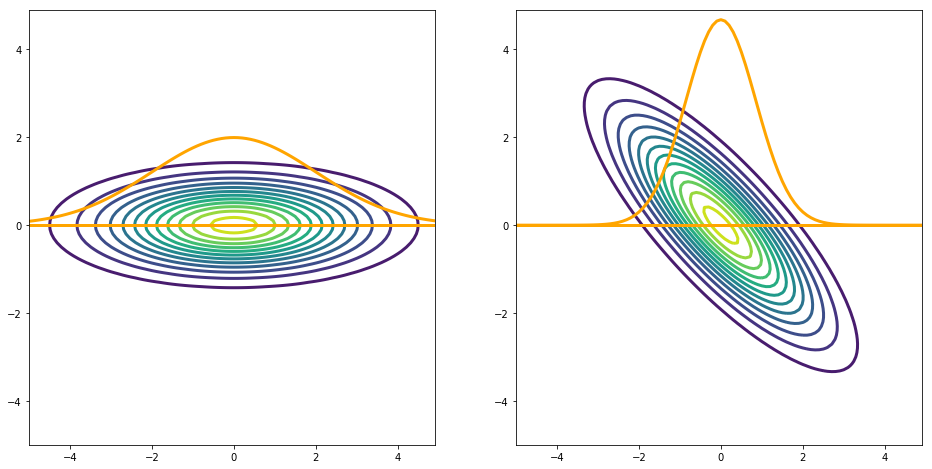

In [168]:
def p_pdf(mu, sigma, x):
    x_shape = x.shape
    sigma = np.linalg.inv(sigma)
    dx = (x - mu).reshape((-1, 2))
    out = np.sum(dx * (dx @ sigma.T), axis=-1)
    return np.exp(- 0.5 * out).reshape(x_shape[:-1])


def p_pdf_cond(mu, sigma, x):
    partial_sigma_2 = sigma[0,0] - sigma[0,1] * (1 / sigma[1,1]) * sigma[1,0]
    return np.exp(- x**2 / (2 * partial_sigma_2)) / math.sqrt(2 * math.pi * partial_sigma_2)


def rotate_sigma(sigma, theta):
    R = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]])
    return R.T @ sigma @ R


xs_1 = np.arange(-5., 5., 0.1)
xs_2 = np.arange(-5., 5., 0.1)
X1, X2 = np.meshgrid(xs_1, xs_2)
xs = np.stack((X1, X2), axis=-1)

mu = np.array([0., 0.])
sigma = np.array([[4.0, 0.0], [0.0, 0.4]])
sigma2 = rotate_sigma(sigma, math.pi/4)

fig, ax = plt.subplots(figsize=(16, 8), ncols=2)
ax[0].contour(X1, X2, p_pdf(mu, sigma, xs), levels=12, linewidths=3, antialiased=True)
ax[0].plot(xs_1, 10 * p_pdf_cond(mu, sigma, xs_1), color='orange', linewidth=3)
ax[0].plot([np.min(X1), np.max(X2)], [0, 0], color='orange', linewidth=3)
ax[1].contour(X1, X2, p_pdf(mu, sigma2, xs), levels=12, linewidths=3, antialiased=True)
ax[1].plot(xs_1, 10 * p_pdf_cond(mu, sigma2, xs_1), color='orange', linewidth=3)
ax[1].plot([np.min(X1), np.max(X2)], [0, 0], color='orange', linewidth=3)
plt.show()

<br>

### Warning: conditional gaussians do not mean multivariate gaussian

Event when $p(x|y)$ and $p(y|x)$ are both gaussian, it does not mean that the joint distribution $p(x,y)$ is a multivariate gaussian:

&emsp; $\displaystyle p(x,y) = Z^{-1} e^{-x^2 y^2}$

<br>

# Independent gaussian sampled data points
---



* independence => covariance matrix of the form $\alpha^{-1} I_n$

<br>

### Independent and identically distributed points

Say we have sampled $D$ independent data points $x_1 \dots x_D$ from a univariate gaussian distrubtion $p(x) = \mathcal{N}(x|\mu,\sigma^2)$, we can see their joint distribution as a multivariate gaussian with a diagonal covariance matrix:

&emsp; $\displaystyle p(x_1 \dots x_D) = \mathcal{N}(x|\mu,\sigma^2 I_D)$

The proof only requires to rearange the terms a little bit:

&emsp; $\displaystyle p(x_1 \dots x_D) = \prod p(x_i) = \frac{1}{(2 \pi \sigma^2)^{D/2}} e^{-\frac{1}{2 \sigma^2} \sum_i (x_i-\mu)^2} = \frac{1}{(2 \pi \sigma^2)^{D/2}} e^{-\frac{1}{2} \sum_i (x_i-\mu) \sigma^{-2} (x_i-\mu) }$

The same can be done for multivariate gaussians, in which the covariance matrix is replicated along the diagonal.

<br>

### Independent but not identically distributed

If we sample $D$ data points $x_1 \dots x_D$ from $D$ univaritate gaussian distributions of the form $\mathcal{N}(x_i|\mu_i,\sigma_i^2)$, we can see their joint distribution as a multivariate gaussian with a diagonal covariance matrix:

&emsp; $\displaystyle p(x_1 \dots x_D) = \mathcal{N}(x|\mu,\Sigma)$
&emsp; where
&emsp; $\mu = \begin{pmatrix} \mu_1 \\ \vdots \\ \mu_D \end{pmatrix}$
&emsp; and
&emsp; $\Sigma = \begin{pmatrix} \sigma_1^2 & \dots & 0 \\ \vdots & & \vdots \\ 0 & \dots & \sigma_D^2 \end{pmatrix}$

One way to interprete this is that a multivariate gaussian distribution can always be seen, once the covariance matrix is diagonalized, as independent gaussian distributions multiplied toegether.

<br>

# Conjugate priors
---

* todo